# Introducción

In [ ]:
import pandas_datareader.data as web
from datetime import datetime
import datetime as dt

In [ ]:
#!pip install mplfinance

In [ ]:
import mplfinance as mpf

# Precio del bitcoin por mes

In [ ]:
# Asignando parametros de mes
inicio_mes = dt.datetime(2020, 12, 1)
fin_mes = dt.datetime(2020, 12, 31)

# creamos un dataframe
df_mes = web.DataReader('BTC-USD', 'yahoo', inicio_mes, fin_mes)

> **btc-usd**: corresponde al ticker de la acción 


# Gráfica de velas

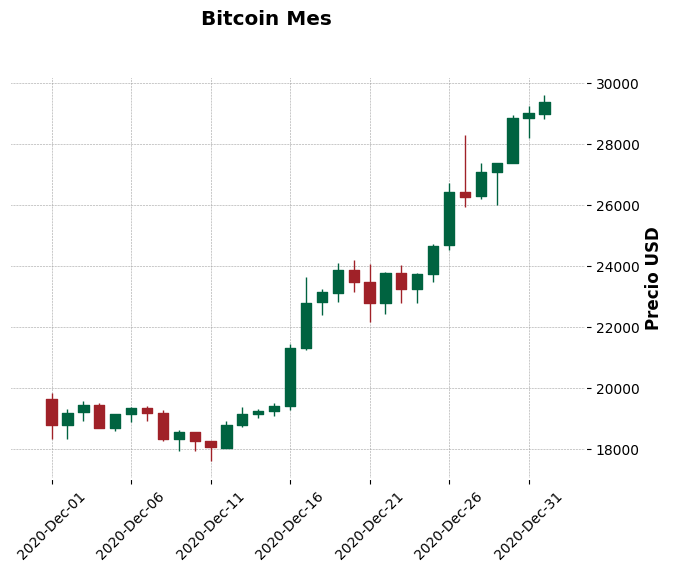

In [ ]:
mpf.plot(df_mes, type='candle', style='charles', title='Bitcoin Mes', ylabel='Precio USD')

# Precio por día

In [ ]:
hoy = datetime.now()

# Cambiando parametros 
inicio_dia = dt.datetime(hoy.year, hoy.month, hoy.day)
fin_dia = dt.datetime(hoy.year, hoy.month, hoy.day)

df_dia = web.DataReader('BTC-USD', 'yahoo', inicio_dia, fin_dia)
df_dia

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-27,48203.9375,46287.441406,46581.8125,47414.84375,48194334720,47414.84375


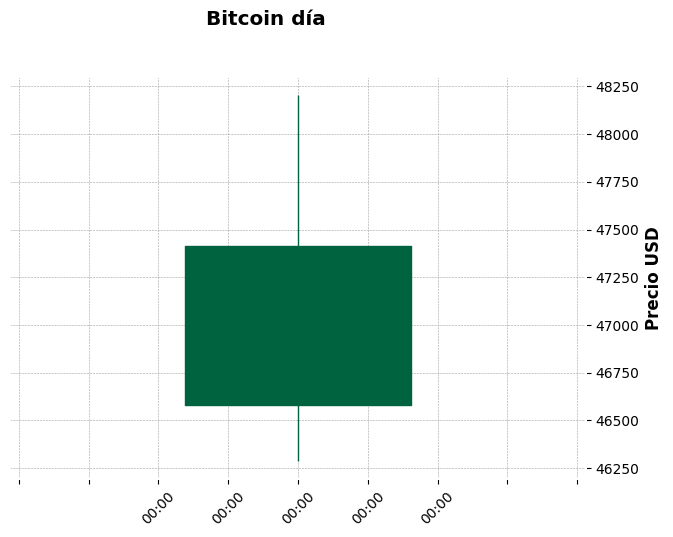

In [ ]:
mpf.plot(df_dia, type='candle', style='charles', title='Bitcoin día', ylabel='Precio USD')

# Predicción del precio de Bitcoin (Facebook-PROPHET)

In [ ]:
from fbprophet import Prophet

In [ ]:
# Establecer el tiempo de consulta
now = datetime.now()

#Primer registro de yahoo finance sobre BTC-USD
start_hist = dt.datetime(2014,9,16) 
end_hist = dt.datetime(now.year, now.month, now.day)

df_hist = web.DataReader('BTC-USD', 'yahoo', start_hist, end_hist)
df_hist.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [ ]:
df_hist.reset_index(level=0, inplace=True)

In [ ]:
df_hist.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [ ]:
df_prophet = df_hist[['Date', 'Close']]
df_prophet.columns = ['ds', 'y'] #datetimeseries, y (value to predict)

df_prophet.head()

,ds,y
0,2014-09-16,457.334015
1,2014-09-17,424.440002
2,2014-09-18,394.795990
3,2014-09-19,408.903992
4,2014-09-20,398.821014


# Fit data model

In [ ]:
#Invocamos al profeta
prophet = Prophet()
prophet.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Presentando al profeta la hoja de examen
future = prophet.make_future_dataframe(periods=365)

In [ ]:
future.head()

,ds
0,2014-09-16
1,2014-09-17
2,2014-09-18
3,2014-09-19
4,2014-09-20


In [ ]:
forecast = prophet.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-16,182.586252,-5014.162495,3294.649329,182.586252,182.586252,-943.692675,-943.692675,-943.692675,-34.471878,-34.471878,-34.471878,-909.220798,-909.220798,-909.220798,0.0,0.0,0.0,-761.106423
1,2014-09-17,181.607758,-5072.489032,3721.958377,181.607758,181.607758,-907.665410,-907.665410,-907.665410,-11.766312,-11.766312,-11.766312,-895.899097,-895.899097,-895.899097,0.0,0.0,0.0,-726.057652
2,2014-09-18,180.629264,-5083.785921,3745.180313,180.629264,180.629264,-868.208420,-868.208420,-868.208420,14.950471,14.950471,14.950471,-883.158891,-883.158891,-883.158891,0.0,0.0,0.0,-687.579156
3,2014-09-19,179.650770,-4740.770714,3399.793992,179.650770,179.650770,-850.584957,-850.584957,-850.584957,21.011374,21.011374,21.011374,-871.596331,-871.596331,-871.596331,0.0,0.0,0.0,-670.934187
4,2014-09-20,178.672276,-5104.808741,3516.408408,178.672276,178.672276,-834.301657,-834.301657,-834.301657,27.438166,27.438166,27.438166,-861.739823,-861.739823,-861.739823,0.0,0.0,0.0,-655.629382


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
2681,2022-01-29,42279.198087,34111.520117,49452.806166
2682,2022-01-30,42346.680254,33996.137307,49884.872665
2683,2022-01-31,42440.677650,34713.978208,49767.544689
2684,2022-02-01,42561.497919,34760.487502,50723.898284
2685,2022-02-02,42740.202381,34381.460211,50487.857937
2686,2022-02-03,42940.820183,35021.273087,50865.776073
2687,2022-02-04,43136.307445,35168.313953,50388.394857
2688,2022-02-05,43344.874129,34898.633469,51712.783606
2689,2022-02-06,43531.028716,34953.796844,51717.833477
2690,2022-02-07,43727.688796,35829.149380,51418.289007


# Gráfica de predicciones

In [ ]:
from fbprophet.plot import plot

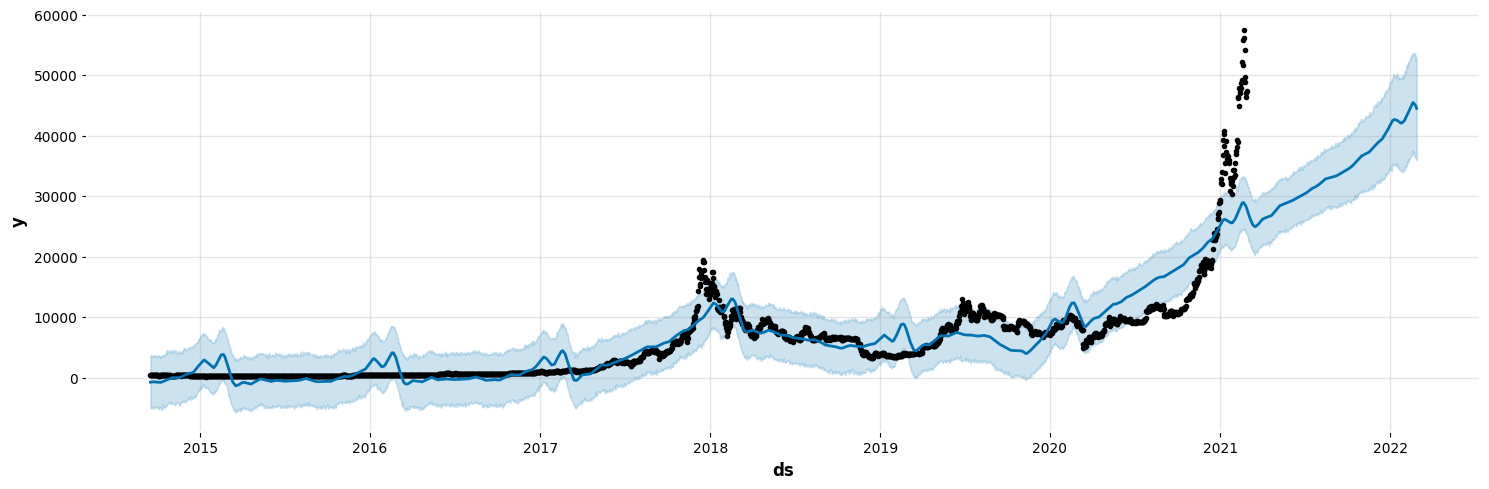

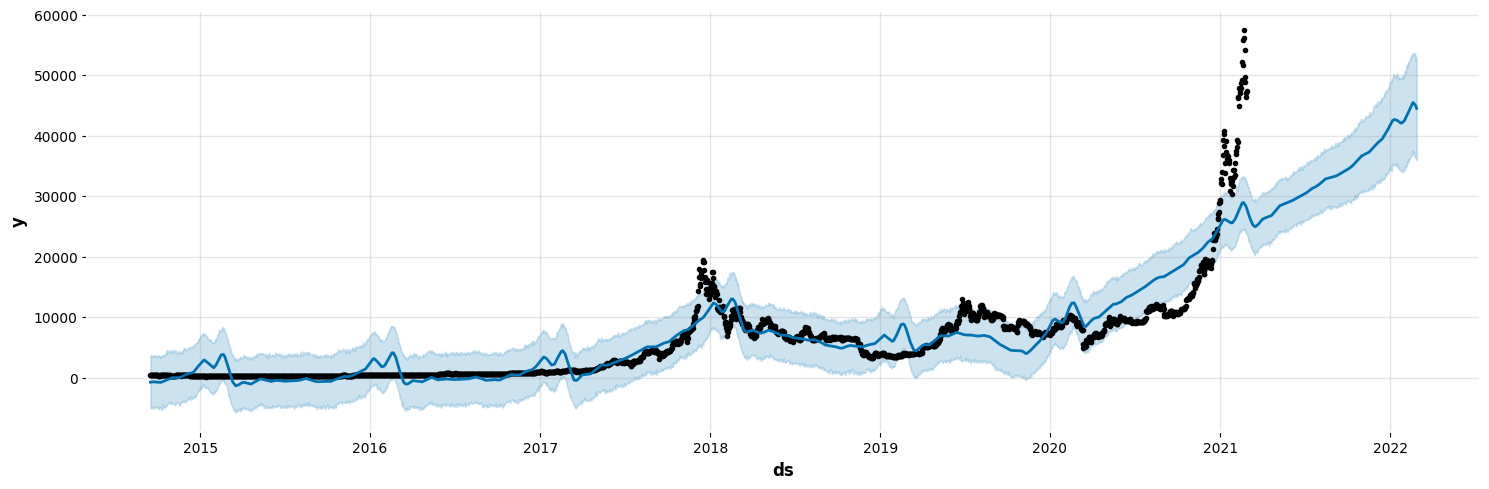

In [ ]:
prophet.plot(forecast, figsize=(15, 5))

* La **línea negra** de la primer gráfica 
es lo que en realidad paso con el bitcoin.
* la **línea azul** es lo que el profeta realizó

